## k-Nearest Neighbors

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## As given from previous homeworks in COGS 118A 
def draw_heatmap_knn(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

## covtype.data

In [4]:
# Take random sample of 10000 instances to represent the covtype.data
COV_TYPE = np.loadtxt('./covtype.data', delimiter=',')
COV_TYPE_X = COV_TYPE[:,:53]
COV_TYPE_Y = COV_TYPE[:,54]
COV_TYPE_X, null_1, COV_TYPE_Y, null_2 = train_test_split(COV_TYPE_X, COV_TYPE_Y, train_size=10000/581012)

In [5]:
# Set largest class to be positive and rest to be negative
for i in range(len(COV_TYPE_Y)):
    if COV_TYPE_Y[i] == 2: COV_TYPE_Y[i] = 1
    else: COV_TYPE_Y[i] = 0

In [6]:
cov_xtrain, cov_xtest, cov_ytrain, cov_ytest = train_test_split(COV_TYPE_X, COV_TYPE_Y, train_size=0.20)
knn_1 = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1,400,15), 'metric': ['euclidean']}
clf_1 = GridSearchCV(knn_1, params, cv=5)
clf_1.fit(cov_xtrain, cov_ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([  1,  16,  31,  46,  61,  76,  91, 106, 121, 136, 151, 166, 181,
       196, 211, 226, 241, 256, 271, 286, 301, 316, 331, 346, 361, 376, 391]), 'metric': ['euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

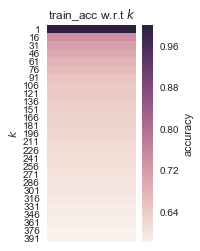

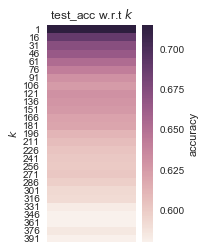

In [7]:
draw_heatmap_knn(np.array(clf_1.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params['n_neighbors'])
draw_heatmap_knn(np.array(clf_1.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params['n_neighbors'])

In [8]:
best_k = clf_1.best_params_['n_neighbors']
knn_final_1 = KNeighborsClassifier(n_neighbors=best_k)
knn_final_1.fit(cov_xtrain, cov_ytrain)
print('KNN Classifier Accuracy on COV data on 20/80: ', knn_final_1.score(cov_xtest, cov_ytest))
print('Best hyper-parameters: ', best_k)

KNN Classifier Accuracy on COV data on 20/80:  0.72
Best hyper-parameters:  1


In [9]:
cov_xtrain, cov_xtest, cov_ytrain, cov_ytest = train_test_split(COV_TYPE_X, COV_TYPE_Y, train_size=0.50)
knn_2 = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1,1000,38), 'metric': ['euclidean']}
clf_2 = GridSearchCV(knn_2, params, cv=5)
clf_2.fit(cov_xtrain, cov_ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([  1,  39,  77, 115, 153, 191, 229, 267, 305, 343, 381, 419, 457,
       495, 533, 571, 609, 647, 685, 723, 761, 799, 837, 875, 913, 951, 989]), 'metric': ['euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

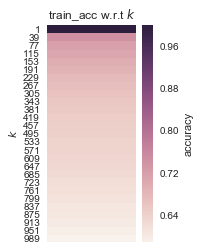

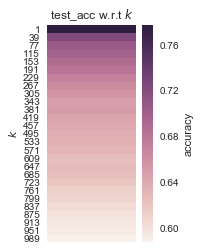

In [10]:
draw_heatmap_knn(np.array(clf_2.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params['n_neighbors'])
draw_heatmap_knn(np.array(clf_2.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params['n_neighbors'])

In [11]:
best_k = clf_2.best_params_['n_neighbors']
knn_final_2 = KNeighborsClassifier(n_neighbors=best_k)
knn_final_2.fit(cov_xtrain, cov_ytrain)
print('KNN Classifier Accuracy on COV data on 50/50: ', knn_final_2.score(cov_xtest, cov_ytest))
print('Best hyper-parameters: ', best_k)

KNN Classifier Accuracy on COV data on 50/50:  0.7796
Best hyper-parameters:  1


In [12]:
cov_xtrain, cov_xtest, cov_ytrain, cov_ytest = train_test_split(COV_TYPE_X, COV_TYPE_Y, train_size=0.80)
knn_3 = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1,800,30), 'metric': ['euclidean']}
clf_3 = GridSearchCV(knn_3, params, cv=5)
clf_3.fit(cov_xtrain, cov_ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([  1,  31,  61,  91, 121, 151, 181, 211, 241, 271, 301, 331, 361,
       391, 421, 451, 481, 511, 541, 571, 601, 631, 661, 691, 721, 751, 781]), 'metric': ['euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

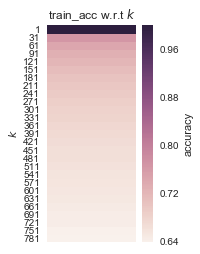

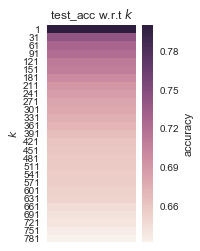

In [13]:
draw_heatmap_knn(np.array(clf_3.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params['n_neighbors'])
draw_heatmap_knn(np.array(clf_3.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params['n_neighbors'])

In [14]:
best_k = clf_3.best_params_['n_neighbors']
knn_final_3 = KNeighborsClassifier(n_neighbors=best_k)
knn_final_3.fit(cov_xtrain, cov_ytrain)
print('KNN Classifier Accuracy on COV data on 80/20: ', knn_final_3.score(cov_xtest, cov_ytest))
print('Best hyper-parameters: ', best_k)

KNN Classifier Accuracy on COV data on 80/20:  0.8135
Best hyper-parameters:  1


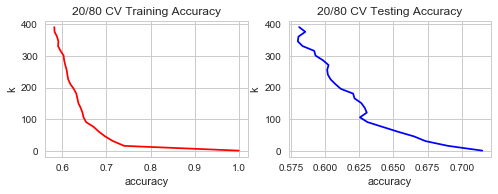

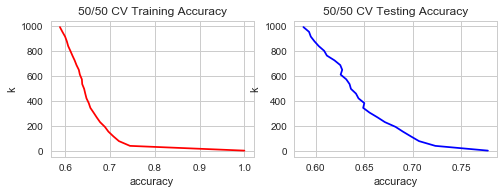

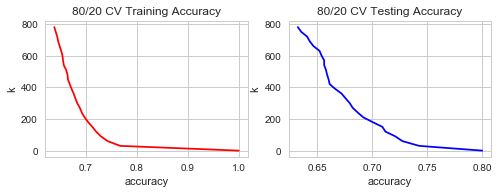

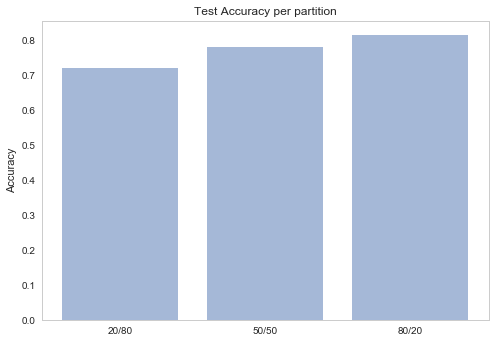

In [55]:
partition_20_80_cross_val_train_acc = clf_1.cv_results_['mean_train_score']
partition_20_80_cross_val_test_acc = clf_1.cv_results_['mean_test_score']
k_values_20_80 = np.arange(1,400,15)

partition_50_50_cross_val_train_acc = clf_2.cv_results_['mean_train_score']
partition_50_50_cross_val_test_acc = clf_2.cv_results_['mean_test_score']
k_values_50_50 = np.arange(1,1000,38)

partition_80_20_cross_val_train_acc = clf_3.cv_results_['mean_train_score']
partition_80_20_cross_val_test_acc = clf_3.cv_results_['mean_test_score']
k_values_80_20 = np.arange(1,800,30)

plt.figure(1)
plt.subplot(221)
plt.title('20/80 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('k')
plt.grid(True)
plt.plot(partition_20_80_cross_val_train_acc, k_values_20_80, 'r')
plt.subplot(222)
plt.title('20/80 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('k')
plt.plot(partition_20_80_cross_val_test_acc, k_values_20_80, 'b')
plt.show()

plt.figure(2)
plt.subplot(221)
plt.title('50/50 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('k')
plt.grid(True)
plt.plot(partition_50_50_cross_val_train_acc, k_values_50_50, 'r')
plt.subplot(222)
plt.title('50/50 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('k')
plt.plot(partition_50_50_cross_val_test_acc, k_values_50_50, 'b')
plt.show()

plt.figure(3)
plt.subplot(221)
plt.title('80/20 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('k')
plt.grid(True)
plt.plot(partition_80_20_cross_val_train_acc, k_values_80_20, 'r')
plt.subplot(222)
plt.title('80/20 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('k')
plt.plot(partition_80_20_cross_val_test_acc, k_values_80_20, 'b')
plt.show()

plt.figure(4)
partitions = ('20/80', '50/50', '80/20')
y_tic = np.arange(len(partitions))
performance_by_partition = [0.72, 0.7796, 0.8135]
plt.bar(y_tic, performance_by_partition, align='center', alpha=0.5)
plt.xticks(y_tic, partitions)
plt.ylabel('Accuracy')
plt.title('Test Accuracy per partition')
plt.show()

## ADULT.data

In [15]:
adults = pd.read_csv('./adult.data.txt')
adults = pd.get_dummies(adults, prefix=['workclass', 'education', 'marital_status', 
'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'])
adults = adults.as_matrix()
adults_x = adults[:,:108]
adults_y = adults[:,109]

In [16]:
adults_x, null_1, adults_y, null_2 = train_test_split(adults_x, adults_y, train_size=10000/32560)

In [17]:
# 20/80
adults_train_x, adults_test_x, adults_train_y, adults_test_y = train_test_split(adults_x, adults_y, train_size=0.20)
adults_knn_1 = KNeighborsClassifier()
k_list = np.arange(1,400,15)
params = {'n_neighbors': k_list, 'metric': ['euclidean']}

In [18]:
adults_clf_1 = GridSearchCV(adults_knn_1, params, cv=5)
adults_clf_1.fit(adults_train_x, adults_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([  1,  16,  31,  46,  61,  76,  91, 106, 121, 136, 151, 166, 181,
       196, 211, 226, 241, 256, 271, 286, 301, 316, 331, 346, 361, 376, 391]), 'metric': ['euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

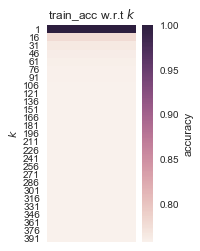

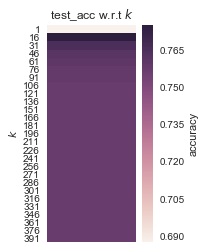

In [19]:
draw_heatmap_knn(np.array(adults_clf_1.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params['n_neighbors'])
draw_heatmap_knn(np.array(adults_clf_1.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params['n_neighbors'])

In [20]:
adults_knn_final_1 = KNeighborsClassifier(n_neighbors=adults_clf_1.best_params_['n_neighbors'])
adults_knn_final_1.fit(adults_train_x, adults_train_y)
print('KNN Classifier Accuracy on ADULT.data with 20/80 split: ', adults_knn_final_1.score(adults_test_x, adults_test_y))
print('Best hyper-parameters: ', adults_clf_1.best_params_['n_neighbors'])

KNN Classifier Accuracy on ADULT.data with 20/80 split:  0.772375
Best hyper-parameters:  16


In [21]:
# 50/50 
adults_train_x, adults_test_x, adults_train_y, adults_test_y = train_test_split(adults_x, adults_y, train_size=0.50)
adults_knn_2 = KNeighborsClassifier()
k_list = np.arange(1,1000,38)
params = {'n_neighbors': k_list, 'metric': ['euclidean']}

In [22]:
adults_clf_2 = GridSearchCV(adults_knn_2, params, cv=5)
adults_clf_2.fit(adults_train_x, adults_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([  1,  39,  77, 115, 153, 191, 229, 267, 305, 343, 381, 419, 457,
       495, 533, 571, 609, 647, 685, 723, 761, 799, 837, 875, 913, 951, 989]), 'metric': ['euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

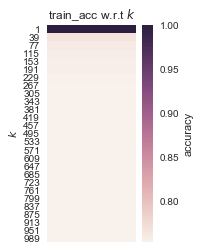

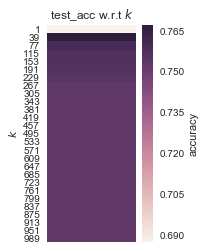

In [23]:
draw_heatmap_knn(np.array(adults_clf_2.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params['n_neighbors'])
draw_heatmap_knn(np.array(adults_clf_2.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params['n_neighbors'])

In [24]:
adults_knn_final_2 = KNeighborsClassifier(n_neighbors=adults_clf_2.best_params_['n_neighbors'])
adults_knn_final_2.fit(adults_train_x, adults_train_y)
print('KNN Classifier Accuracy on ADULT.data with 50/50 split: ', adults_knn_final_2.score(adults_test_x, adults_test_y))
print('Best hyper-parameters: ', adults_clf_2.best_params_['n_neighbors'])

KNN Classifier Accuracy on ADULT.data with 50/50 split:  0.7758
Best hyper-parameters:  39


In [25]:
# 80/20
adults_train_x, adults_test_x, adults_train_y, adults_test_y = train_test_split(adults_x, adults_y, train_size=0.80)
adults_knn_3 = KNeighborsClassifier()
k_list = np.arange(1,800,30)
params = {'n_neighbors': k_list, 'metric': ['euclidean']}

In [26]:
adults_clf_3 = GridSearchCV(adults_knn_3, params, cv=5)
adults_clf_3.fit(adults_train_x, adults_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([  1,  31,  61,  91, 121, 151, 181, 211, 241, 271, 301, 331, 361,
       391, 421, 451, 481, 511, 541, 571, 601, 631, 661, 691, 721, 751, 781]), 'metric': ['euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

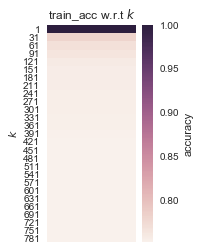

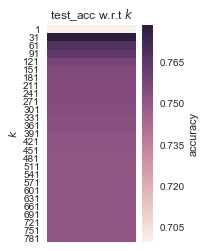

In [27]:
draw_heatmap_knn(np.array(adults_clf_3.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params['n_neighbors'])
draw_heatmap_knn(np.array(adults_clf_3.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params['n_neighbors'])

In [28]:
adults_knn_final_3 = KNeighborsClassifier(n_neighbors=adults_clf_3.best_params_['n_neighbors'])
adults_knn_final_3.fit(adults_train_x, adults_train_y)
print('KNN Classifier Accuracy on ADULT.data with 80/20 split: ', adults_knn_final_2.score(adults_test_x, adults_test_y))
print('Best hyper-parameters: ', adults_clf_3.best_params_['n_neighbors'])

KNN Classifier Accuracy on ADULT.data with 80/20 split:  0.7845
Best hyper-parameters:  31


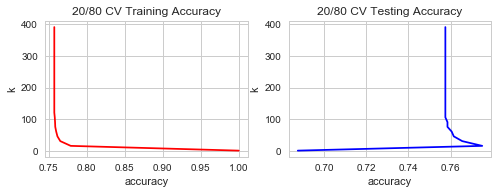

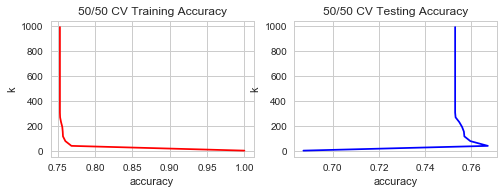

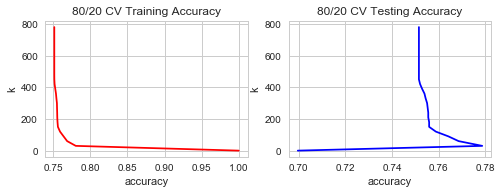

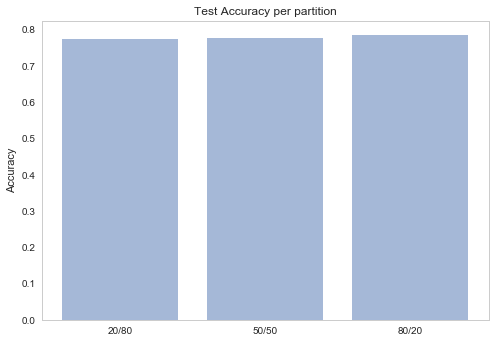

In [56]:
partition_20_80_cross_val_train_acc = adults_clf_1.cv_results_['mean_train_score']
partition_20_80_cross_val_test_acc = adults_clf_1.cv_results_['mean_test_score']
k_values_20_80 = np.arange(1,400,15)

partition_50_50_cross_val_train_acc = adults_clf_2.cv_results_['mean_train_score']
partition_50_50_cross_val_test_acc = adults_clf_2.cv_results_['mean_test_score']
k_values_50_50 = np.arange(1,1000,38)

partition_80_20_cross_val_train_acc = adults_clf_3.cv_results_['mean_train_score']
partition_80_20_cross_val_test_acc = adults_clf_3.cv_results_['mean_test_score']
k_values_80_20 = np.arange(1,800,30)

plt.figure(1)
plt.subplot(221)
plt.title('20/80 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('k')
plt.grid(True)
plt.plot(partition_20_80_cross_val_train_acc, k_values_20_80, 'r')
plt.subplot(222)
plt.title('20/80 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('k')
plt.plot(partition_20_80_cross_val_test_acc, k_values_20_80, 'b')
plt.show()

plt.figure(2)
plt.subplot(221)
plt.title('50/50 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('k')
plt.grid(True)
plt.plot(partition_50_50_cross_val_train_acc, k_values_50_50, 'r')
plt.subplot(222)
plt.title('50/50 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('k')
plt.plot(partition_50_50_cross_val_test_acc, k_values_50_50, 'b')
plt.show()

plt.figure(3)
plt.subplot(221)
plt.title('80/20 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('k')
plt.grid(True)
plt.plot(partition_80_20_cross_val_train_acc, k_values_80_20, 'r')
plt.subplot(222)
plt.title('80/20 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('k')
plt.plot(partition_80_20_cross_val_test_acc, k_values_80_20, 'b')
plt.show()

plt.figure(4)
partitions = ('20/80', '50/50', '80/20')
y_tic = np.arange(len(partitions))
performance_by_partition = [0.772375, 0.7758, 0.7845]
plt.bar(y_tic, performance_by_partition, align='center', alpha=0.5)
plt.xticks(y_tic, partitions)
plt.ylabel('Accuracy')
plt.title('Test Accuracy per partition')
plt.show()

## letter-recognition.data (Problem 2)

In [29]:
letters = pd.read_csv('./letter-recognition.data')
letters_samples = letters.as_matrix()[:,1:17]
letters_p2 = letters.as_matrix()[:,0]

letters_p2_x, null_1, letters_p2_y, null_2 = train_test_split(letters_samples,
                                                              letters_p2,
                                                              train_size=10000/19999)

# Treat letters_p2 as A-M positive, remaining negative
for i in range(len(letters_p2_y)):
    if letters_p2_y[i] == "A": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "B": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "C": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "D": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "E": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "F": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "G": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "H": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "I": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "J": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "K": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "L": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "M": letters_p2_y[i] = 1
    else:
        letters_p2_y[i] = 0
letters_p2_y = letters_p2_y.astype('int')

In [30]:
# 20/80
letters_train_x, letters_test_x, letters_train_y, letters_test_y = train_test_split(letters_p2_x, 
                                                                                    letters_p2_y,
                                                                                    train_size=0.20)
knn_letters_p2 = KNeighborsClassifier()
k_list = np.arange(1,400,15)
params = {'n_neighbors': k_list, 'metric':['euclidean']}
lettersp2_clf_1 = GridSearchCV(knn_letters_p2, params, cv=5)
lettersp2_clf_1.fit(letters_train_x, letters_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([  1,  16,  31,  46,  61,  76,  91, 106, 121, 136, 151, 166, 181,
       196, 211, 226, 241, 256, 271, 286, 301, 316, 331, 346, 361, 376, 391]), 'metric': ['euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

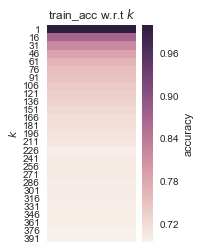

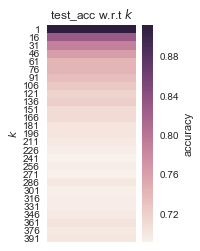

In [31]:
draw_heatmap_knn(np.array(lettersp2_clf_1.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params['n_neighbors'])
draw_heatmap_knn(np.array(lettersp2_clf_1.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params['n_neighbors'])

In [32]:
knn_lettersp2_1 = KNeighborsClassifier(n_neighbors=lettersp2_clf_1.best_params_['n_neighbors'])
knn_lettersp2_1.fit(letters_train_x, letters_train_y)
print('KNN Accuracy on letter-recognition.data (problem 2) 20/80: ', knn_lettersp2_1.score(letters_test_x, letters_test_y))
print('Best Parameter: ', lettersp2_clf_1.best_params_['n_neighbors'])

KNN Accuracy on letter-recognition.data (problem 2) 20/80:  0.919
Best Parameter:  1


In [33]:
# 50/50
letters_train_x, letters_test_x, letters_train_y, letters_test_y = train_test_split(letters_p2_x, 
                                                                                    letters_p2_y,
                                                                                    train_size=0.50)
knn_letters_p2 = KNeighborsClassifier()
k_list = np.arange(1,1000,38)
params = {'n_neighbors': k_list, 'metric':['euclidean']}
lettersp2_clf_2 = GridSearchCV(knn_letters_p2, params, cv=5)
lettersp2_clf_2.fit(letters_train_x, letters_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([  1,  39,  77, 115, 153, 191, 229, 267, 305, 343, 381, 419, 457,
       495, 533, 571, 609, 647, 685, 723, 761, 799, 837, 875, 913, 951, 989]), 'metric': ['euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

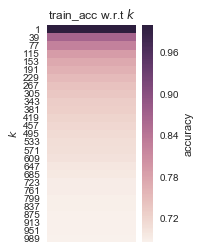

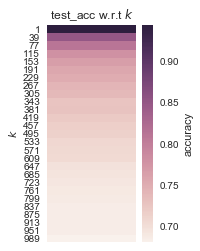

In [34]:
draw_heatmap_knn(np.array(lettersp2_clf_2.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params['n_neighbors'])
draw_heatmap_knn(np.array(lettersp2_clf_2.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params['n_neighbors'])

In [35]:
knn_lettersp2_2 = KNeighborsClassifier(n_neighbors=lettersp2_clf_2.best_params_['n_neighbors'])
knn_lettersp2_2.fit(letters_train_x, letters_train_y)
print('KNN Accuracy on letter-recognition.data (problem 2) 50/50: ', knn_lettersp2_2.score(letters_test_x, letters_test_y))
print('Best Parameter: ', lettersp2_clf_2.best_params_['n_neighbors'])

KNN Accuracy on letter-recognition.data (problem 2) 50/50:  0.9586
Best Parameter:  1


In [36]:
# 80/20
letters_train_x, letters_test_x, letters_train_y, letters_test_y = train_test_split(letters_p2_x, 
                                                                                    letters_p2_y,
                                                                                    train_size=0.80)
knn_letters_p2 = KNeighborsClassifier()
k_list = np.arange(1,800,30)
params = {'n_neighbors': k_list, 'metric':['euclidean']}
lettersp2_clf_3 = GridSearchCV(knn_letters_p2, params, cv=5)
lettersp2_clf_3.fit(letters_train_x, letters_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([  1,  31,  61,  91, 121, 151, 181, 211, 241, 271, 301, 331, 361,
       391, 421, 451, 481, 511, 541, 571, 601, 631, 661, 691, 721, 751, 781]), 'metric': ['euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

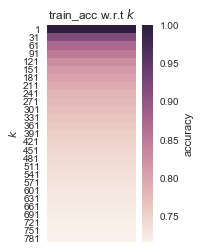

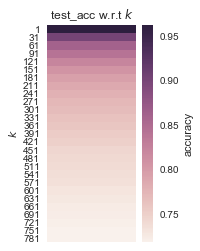

In [37]:
draw_heatmap_knn(np.array(lettersp2_clf_3.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params['n_neighbors'])
draw_heatmap_knn(np.array(lettersp2_clf_3.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params['n_neighbors'])

In [38]:
knn_lettersp2_3 = KNeighborsClassifier(n_neighbors=lettersp2_clf_3.best_params_['n_neighbors'])
knn_lettersp2_3.fit(letters_train_x, letters_train_y)
print('KNN Accuracy on letter-recognition.data (problem 2) 80/20: ', knn_lettersp2_3.score(letters_test_x, letters_test_y))
print('Best Parameter: ', lettersp2_clf_3.best_params_['n_neighbors'])

KNN Accuracy on letter-recognition.data (problem 2) 80/20:  0.9695
Best Parameter:  1


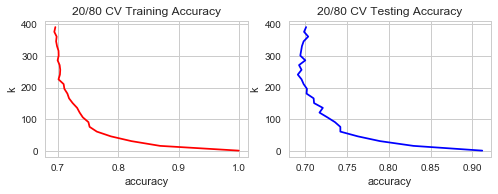

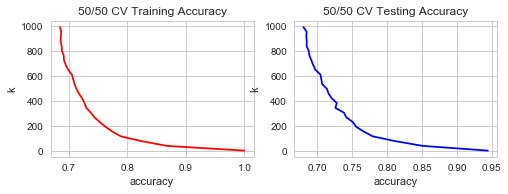

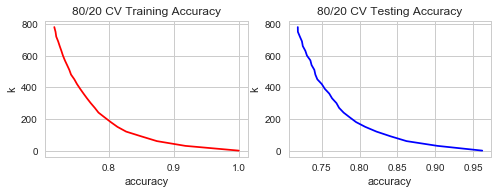

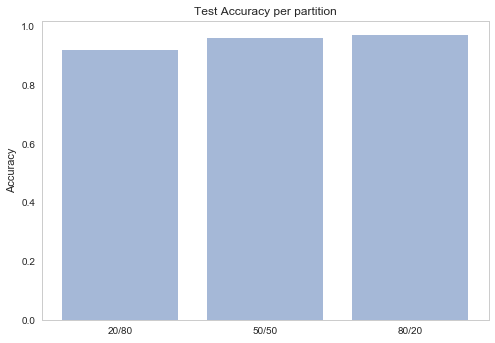

In [57]:
partition_20_80_cross_val_train_acc = lettersp2_clf_1.cv_results_['mean_train_score']
partition_20_80_cross_val_test_acc = lettersp2_clf_1.cv_results_['mean_test_score']
k_values_20_80 = np.arange(1,400,15)

partition_50_50_cross_val_train_acc = lettersp2_clf_2.cv_results_['mean_train_score']
partition_50_50_cross_val_test_acc = lettersp2_clf_2.cv_results_['mean_test_score']
k_values_50_50 = np.arange(1,1000,38)

partition_80_20_cross_val_train_acc = lettersp2_clf_3.cv_results_['mean_train_score']
partition_80_20_cross_val_test_acc = lettersp2_clf_3.cv_results_['mean_test_score']
k_values_80_20 = np.arange(1,800,30)

plt.figure(1)
plt.subplot(221)
plt.title('20/80 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('k')
plt.grid(True)
plt.plot(partition_20_80_cross_val_train_acc, k_values_20_80, 'r')
plt.subplot(222)
plt.title('20/80 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('k')
plt.plot(partition_20_80_cross_val_test_acc, k_values_20_80, 'b')
plt.show()

plt.figure(2)
plt.subplot(221)
plt.title('50/50 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('k')
plt.grid(True)
plt.plot(partition_50_50_cross_val_train_acc, k_values_50_50, 'r')
plt.subplot(222)
plt.title('50/50 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('k')
plt.plot(partition_50_50_cross_val_test_acc, k_values_50_50, 'b')
plt.show()

plt.figure(3)
plt.subplot(221)
plt.title('80/20 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('k')
plt.grid(True)
plt.plot(partition_80_20_cross_val_train_acc, k_values_80_20, 'r')
plt.subplot(222)
plt.title('80/20 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('k')
plt.plot(partition_80_20_cross_val_test_acc, k_values_80_20, 'b')
plt.show()

plt.figure(4)
partitions = ('20/80', '50/50', '80/20')
y_tic = np.arange(len(partitions))
performance_by_partition = [0.919, 0.9586, 0.9695]
plt.bar(y_tic, performance_by_partition, align='center', alpha=0.5)
plt.xticks(y_tic, partitions)
plt.ylabel('Accuracy')
plt.title('Test Accuracy per partition')
plt.show()